---
execute:
  cache: false
  eval: true
  echo: true
  warning: false
jupyter: python3
---


# Hyperparameter Tuning with PyTorch Lightning and User Models {#sec-light-user-model-601}


In [1]:
#| echo: false
#| label: 601_user_model_first_imports
import numpy as np
import os
from math import inf
import numpy as np
import warnings
if not os.path.exists('./figures'):
    os.makedirs('./figures')
warnings.filterwarnings("ignore")

In this section, we will show how a user defined model can be used for the `PyTorch` Lightning hyperparameter tuning workflow with `spotpython`.

## Using a User Specified Model

As templates, we provide the following three files that allow the user to specify a model in the `/userModel` directory:

* `my_regressor.py`, see @sec-my-regressor
* `my_hyperdict.json`, see @sec-my-hyper-dict-json
* `my_hyperdict.py`, see @sec-my-hyper-dict.

The `my_regressor.py` file contains the model class, which is a subclass of `nn.Module`.
The `my_hyperdict.json` file contains the hyperparameter settings as a dictionary, which are loaded via the `my_hyperdict.py` file.

Note, that we have to add the path to the `userModel` directory to the `sys.path` list as shown below.


In [2]:
#| label: 601_user_model_imports_sys
import sys
sys.path.insert(0, './userModel')
import my_regressor
import my_hyper_dict
from spotpython.hyperparameters.values import add_core_model_to_fun_control

from spotpython.data.diabetes import Diabetes
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.fun.hyperlight import HyperLight
from spotpython.utils.init import (fun_control_init, design_control_init)
from spotpython.utils.eda import gen_design_table
from spotpython.hyperparameters.values import set_hyperparameter
from spotpython.spot import spot

fun_control = fun_control_init(
    PREFIX="601-user-model",
    fun_evals=inf,
    max_time=1,
    data_set = Diabetes(),
    _L_in=10,
    _L_out=1)

add_core_model_to_fun_control(fun_control=fun_control,
                              core_model=my_regressor.MyRegressor,
                              hyper_dict=my_hyper_dict.MyHyperDict)

design_control = design_control_init(init_size=7)

fun = HyperLight().fun

spot_tuner = spot.Spot(fun=fun,fun_control=fun_control, design_control=design_control)

Seed set to 123


Seed set to 123


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 169    | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
169       Trainable params
0         Non-trainable params
169       Total params
0.001     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 19.8 K | train | [8, 10]  | [8, 1]   
---------------------------------------------------------------------
19.8 K    Trainable params
0         Non-trainable params
19.8 K    Total params
0.079     Total estimated model params size (MB)
47        Modules in train mode
0         Modules in eval mode


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 491    | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
491       Trainable params
0         Non-trainable params
491       Total params
0.002     Total estimated model params size (MB)
23        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': nan, 'hp_metric': nan}


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 5.4 K  | train | [8, 10]  | [8, 1]   
---------------------------------------------------------------------
5.4 K     Trainable params
0         Non-trainable params
5.4 K     Total params
0.022     Total estimated model params size (MB)
39        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 4795.22509765625, 'hp_metric': 4795.22509765625}


`Trainer.fit` stopped: `max_epochs=256` reached.


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 1.6 K  | train | [8, 10]  | [8, 1]   
---------------------------------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.006     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 19881.609375, 'hp_metric': 19881.609375}


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 75.9 K | train | [2, 10]  | [2, 1]   
---------------------------------------------------------------------
75.9 K    Trainable params
0         Non-trainable params
75.9 K    Total params
0.303     Total estimated model params size (MB)
55        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': nan, 'hp_metric': nan}


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 1.6 K  | train | [16, 10] | [16, 1]  
---------------------------------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.006     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 22673.50390625, 'hp_metric': 22673.50390625}


`Trainer.fit` stopped: `max_epochs=16` reached.


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs


train_model result: {'val_loss': 23567.240234375, 'hp_metric': 23567.240234375}



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 491    | train | [4, 10]  | [4, 1]   
---------------------------------------------------------------------
491       Trainable params
0         Non-trainable params
491       Total params
0.002     Total estimated model params size (MB)
23        Modules in train mode
0         Modules in eval mode


train_model result: {'val_loss': 4621.07568359375, 'hp_metric': 4621.07568359375}
spotpython tuning: 4621.07568359375 [#---------] 12.70% 


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs



  | Name   | Type       | Params | Mode  | In sizes | Out sizes
---------------------------------------------------------------------
0 | layers | Sequential | 169    | train | [2, 10]  | [2, 1]   
---------------------------------------------------------------------
169       Trainable params
0         Non-trainable params
169       Total params
0.001     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


`Trainer.fit` stopped: `max_epochs=512` reached.


train_model result: {'val_loss': 20895.22265625, 'hp_metric': 20895.22265625}
spotpython tuning: 4621.07568359375 [##########] 100.00% Done...



| name           | type   | default   |   lower |   upper | tuned               | transform             |   importance | stars   |
|----------------|--------|-----------|---------|---------|---------------------|-----------------------|--------------|---------|
| l1             | int    | 3         |     3.0 |     8.0 | 4.0                 | transform_power_2_int |       100.00 | ***     |
| epochs         | int    | 4         |     4.0 |     9.0 | 7.0                 | transform_power_2_int |       100.00 | ***     |
| batch_size     | int    | 4         |     1.0 |     4.0 | 2.0                 | transform_power_2_int |       100.00 | ***     |
| act_fn         | factor | ReLU      |     0.0 |     5.0 | Swish               | None                  |       100.00 | ***     |
| optimizer      | factor | SGD       |     0.0 |    11.0 | Adagrad             | None                  |       100.00 | ***     |
| dropout_prob   | float  | 0.01      |     0.0 |    0.25 | 0.08633123597746432 | N

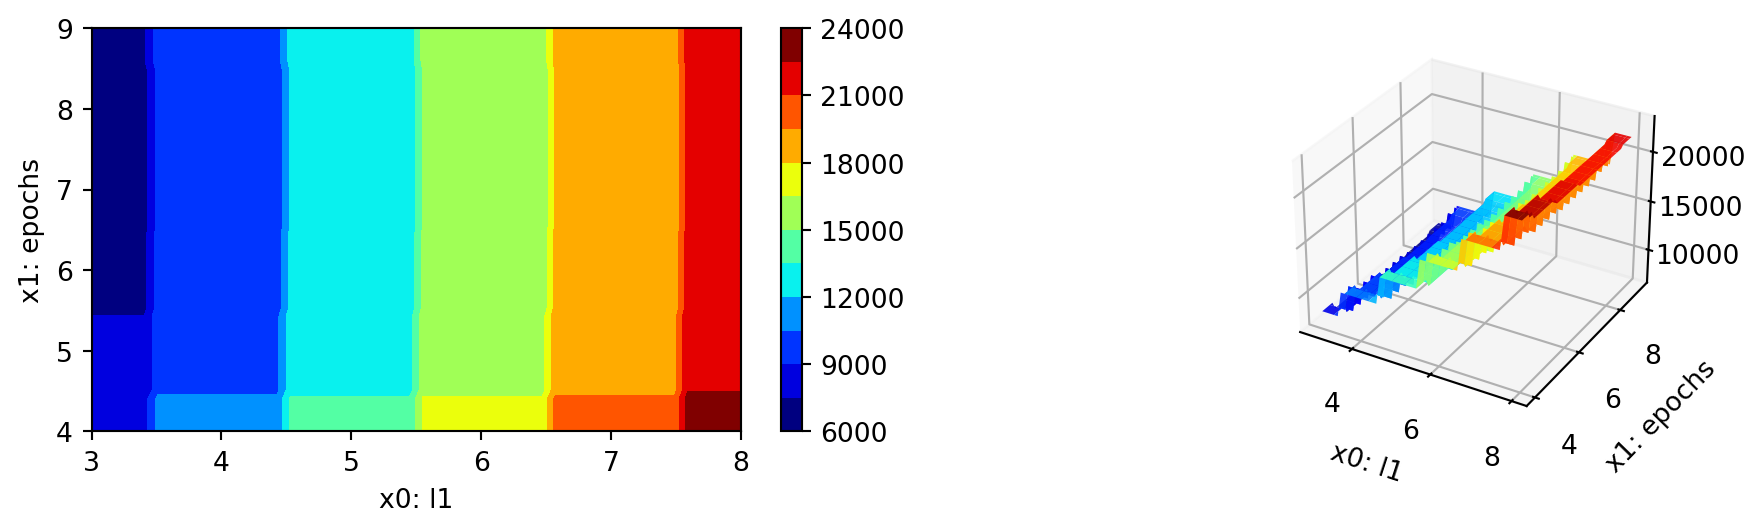

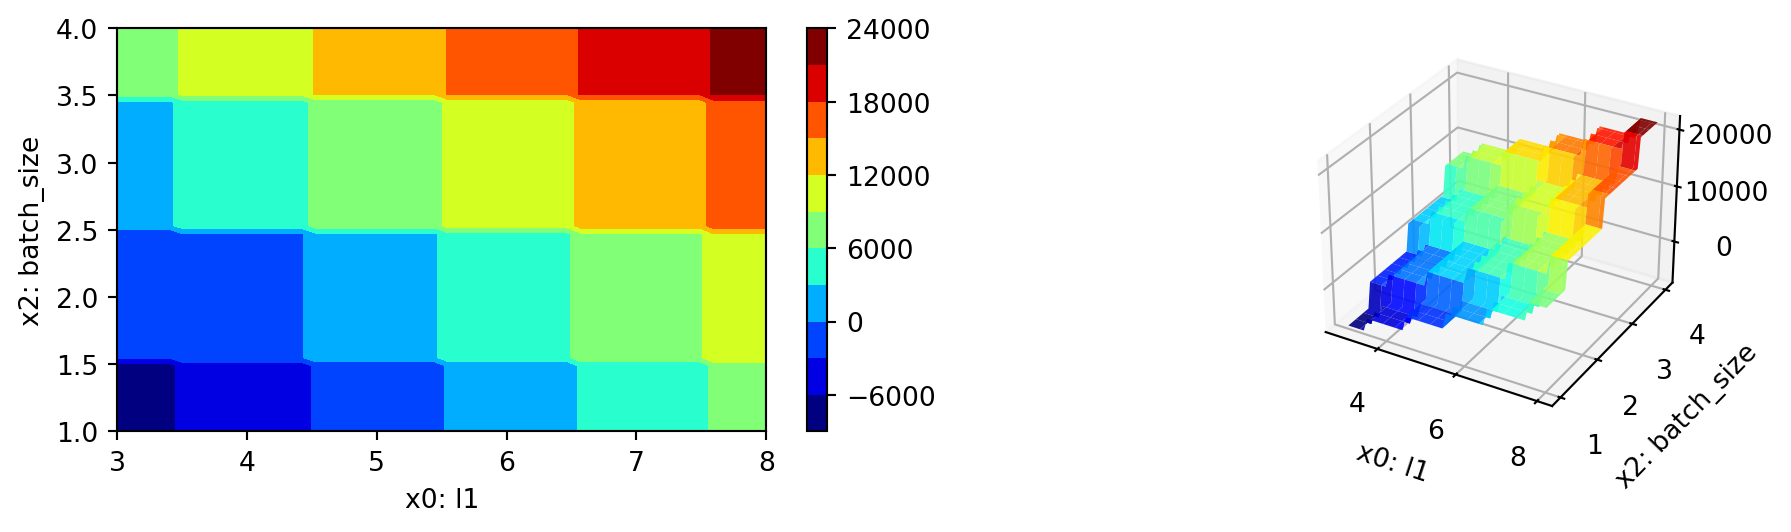

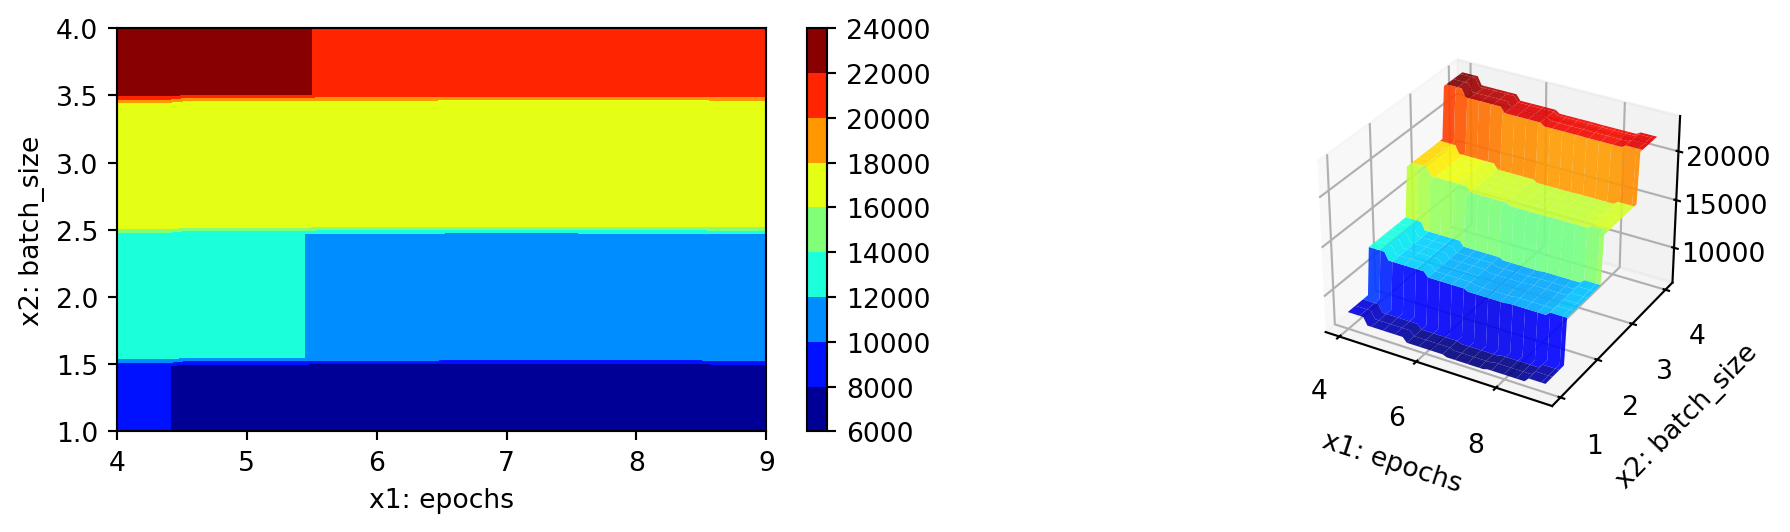

In [3]:
#| label: 601_user_model_run
res = spot_tuner.run()
print(gen_design_table(fun_control=fun_control, spot=spot_tuner))
spot_tuner.plot_important_hyperparameter_contour(max_imp=3)

## Details

### Model Setup

By using `core_model_name = "my_regressor.MyRegressor"`, the user specified model class `MyRegressor` [[SOURCE]](https://github.com/sequential-parameter-optimization/Hyperparameter-Tuning-Cookbook/blob/main/userModel/my_regressor.py) is selected.
For this given `core_model_name`, the local hyper_dict is loaded using the `my_hyper_dict.py` file as shown below.

### The `my_hyper_dict.py` File {#sec-my-hyper-dict}

The `my_hyper_dict.py` file  must be placed in the `/userModel` directory.  It provides a convenience function to load the hyperparameters from user specified the `my_hyper_dict.json` file, see @sec-my-hyper-dict.
The user does not need to modify this file, if the JSON file is stored as `my_hyper_dict.json`. 
Alternative filenames can be specified via the `filename` argument (which is default set to `"my_hyper_dict.json"`).

### The `my_hyper_dict.json` File {#sec-my-hyper-dict-json}

The `my_hyper_dict.json` file contains the hyperparameter settings as a dictionary, which are loaded via the `my_hyper_dict.py` file.
The example below shows the content of the `my_hyper_dict.json` file.
```json
{
    "MyRegressor": {
        "l1": {
            "type": "int",
            "default": 3,
            "transform": "transform_power_2_int",
            "lower": 3,
            "upper": 8
        },
        "epochs": {
            "type": "int",
            "default": 4,
            "transform": "transform_power_2_int",
            "lower": 4,
            "upper": 9
        },
        "batch_size": {
            "type": "int",
            "default": 4,
            "transform": "transform_power_2_int",
            "lower": 1,
            "upper": 4
        },
        "act_fn": {
            "levels": [
                "Sigmoid",
                "Tanh",
                "ReLU",
                "LeakyReLU",
                "ELU",
                "Swish"
            ],
            "type": "factor",
            "default": "ReLU",
            "transform": "None",
            "class_name": "spotpython.torch.activation",
            "core_model_parameter_type": "instance()",
            "lower": 0,
            "upper": 5
        },
        "optimizer": {
            "levels": [
                "Adadelta",
                "Adagrad",
                "Adam",
                "AdamW",
                "SparseAdam",
                "Adamax",
                "ASGD",
                "NAdam",
                "RAdam",
                "RMSprop",
                "Rprop",
                "SGD"
            ],
            "type": "factor",
            "default": "SGD",
            "transform": "None",
            "class_name": "torch.optim",
            "core_model_parameter_type": "str",
            "lower": 0,
            "upper": 11
        },
        "dropout_prob": {
            "type": "float",
            "default": 0.01,
            "transform": "None",
            "lower": 0.0,
            "upper": 0.25
        },
        "lr_mult": {
            "type": "float",
            "default": 1.0,
            "transform": "None",
            "lower": 0.1,
            "upper": 10.0
        },
        "patience": {
            "type": "int",
            "default": 2,
            "transform": "transform_power_2_int",
            "lower": 2,
            "upper": 6
        },
        "initialization": {
            "levels": [
                "Default",
                "Kaiming",
                "Xavier"
            ],
            "type": "factor",
            "default": "Default",
            "transform": "None",
            "core_model_parameter_type": "str",
            "lower": 0,
            "upper": 2
        }
    }
}
```

### The `my_regressor.py` File {#sec-my-regressor}

The `my_regressor.py` file contains [[SOURCE]](https://github.com/sequential-parameter-optimization/Hyperparameter-Tuning-Cookbook/blob/main/userModel/my_regressor.py) the model class, which is a subclass of `nn.Module`. It must implement the following methods:

* `__init__(self, **kwargs)`: The constructor of the model class. The hyperparameters are passed as keyword arguments.
* `forward(self, x: torch.Tensor) -> torch.Tensor`: The forward pass of the model. The input `x` is passed through the model and the output is returned.
* `training_step(self, batch, batch_idx) -> torch.Tensor`: The training step of the model. It takes a batch of data and the batch index as input and returns the loss.
* `validation_step(self, batch, batch_idx) -> torch.Tensor`: The validation step of the model. It takes a batch of data and the batch index as input and returns the loss.
* `test_step(self, batch, batch_idx) -> torch.Tensor`: The test step of the model. It takes a batch of data and the batch index as input and returns the loss.
* `predict(self, x: torch.Tensor) -> torch.Tensor`: The prediction method of the model. It takes an input `x` and returns the prediction.
* `configure_optimizers(self) -> torch.optim.Optimizer`: The method to configure the optimizer of the model. It returns the optimizer.

The file `my_regressor.py` must be placed in the `/userModel` directory. The user can modify the model class to implement a custom model architecture.

We will take a closer look at the methods defined in the `my_regressor.py` file in the next subsections.

#### The `__init__` Method

`__init__()` initializes the `MyRegressor` object. It takes the following arguments:

* `l1` (int): The number of neurons in the first hidden layer.
* `epochs` (int): The number of epochs to train the model for.
* `batch_size` (int): The batch size to use during training.
* `initialization` (str): The initialization method to use for the weights.
* `act_fn` (nn.Module): The activation function to use in the hidden layers.
* `optimizer` (str): The optimizer to use during training.
* `dropout_prob` (float): The probability of dropping out a neuron during training.
* `lr_mult` (float): The learning rate multiplier for the optimizer.
* `patience` (int): The number of epochs to wait before early stopping.
* `_L_in` (int): The number of input features. Not a hyperparameter, but needed to create the network.
* `_L_out` (int): The number of output classes. Not a hyperparameter, but needed to create the network.
* `_torchmetric` (str): The metric to use for the loss function. If `None`, then "mean_squared_error" is used.

It is implemented as follows:


In [4]:
#| label: 601_user_model_init
#| eval: false
class MyRegressor(L.LightningModule):
        def __init__(
        self,
        l1: int,
        epochs: int,
        batch_size: int,
        initialization: str,
        act_fn: nn.Module,
        optimizer: str,
        dropout_prob: float,
        lr_mult: float,
        patience: int,
        _L_in: int,
        _L_out: int,
        _torchmetric: str,
    ):
        super().__init__()
        self._L_in = _L_in
        self._L_out = _L_out
        if _torchmetric is None:
            _torchmetric = "mean_squared_error"
        self._torchmetric = _torchmetric
        self.metric = getattr(torchmetrics.functional.regression, _torchmetric)
        # _L_in and _L_out are not hyperparameters, but are needed to create the network
        # _torchmetric is not a hyperparameter, but is needed to calculate the loss
        self.save_hyperparameters(ignore=["_L_in", "_L_out", "_torchmetric"])
        # set dummy input array for Tensorboard Graphs
        # set log_graph=True in Trainer to see the graph (in traintest.py)
        self.example_input_array = torch.zeros((batch_size, self._L_in))
        if self.hparams.l1 < 4:
            raise ValueError("l1 must be at least 4")
        hidden_sizes = self._get_hidden_sizes()
        # Create the network based on the specified hidden sizes
        layers = []
        layer_sizes = [self._L_in] + hidden_sizes
        layer_size_last = layer_sizes[0]
        for layer_size in layer_sizes[1:]:
            layers += [
                nn.Linear(layer_size_last, layer_size),
                self.hparams.act_fn,
                nn.Dropout(self.hparams.dropout_prob),
            ]
            layer_size_last = layer_size
        layers += [nn.Linear(layer_sizes[-1], self._L_out)]
        # nn.Sequential summarizes a list of modules into a single module,
        # applying them in sequence
        self.layers = nn.Sequential(*layers)

#### The `_get_hidden_sizes` Method

`__init__()` uses the helper method `_get_hidden_sizes()` to calculate the hidden layer sizes based on the number of neurons in the first hidden layer `l1`. The hidden layer sizes are calculated as follows:


In [5]:
#| label: 601_user_model_get_hidden_sizes
#| eval: false
def _get_hidden_sizes(self):
    # Calculate the hidden layer sizes based on the number of neurons in the first hidden layer
    hidden_sizes = [self.hparams.l1]
    while hidden_sizes[-1] > 2:
        hidden_sizes.append(hidden_sizes[-1] // 2)
    return hidden_sizes

#### The `forward` Method

The `forward()` method defines the forward pass of the model. It takes an input tensor `x` and passes it through the network layers to produce an output tensor. It is implemented as follows:


In [6]:
#| label: 601_user_model_forward
#| eval: false
def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layers(x)

#### The `_calculate_loss` Method

The `_calculate_loss()` method calculates the loss based on the predicted output and the target values. It uses the specified metric to calculate the loss. 
It takes the following arguments:

* `batch (tuple)`: A tuple containing a batch of input data and labels.

It is implemented as follows:


In [7]:
#| label: 601_user_model_calculate_loss
#| eval: false
def _calculate_loss(self, batch):
    x, y = batch
    y = y.view(len(y), 1)
    y_hat = self(x)
    loss = self.metric(y_hat, y)
    return loss

#### The `training_step` Method

The `training_step()` method defines the training step of the model. It takes a batch of data and returns the loss. It is implemented as follows:


In [8]:
#| label: 601_user_model_training_step
#| eval: false
def training_step(self, batch: tuple) -> torch.Tensor:
    val_loss = self._calculate_loss(batch)
    return val_loss

#### The `validation_step` Method

The `validation_step()` method defines the validation step of the model. It takes a batch of data and returns the loss. It is implemented as follows:


In [9]:
#| label: 601_user_model_validation_step
#| eval: false
def validation_step(self, batch: tuple) -> torch.Tensor:
    val_loss = self._calculate_loss(batch)
    return val_loss

#### The `test_step` Method

The `test_step()` method defines the test step of the model. It takes a batch of data and returns the loss. It is implemented as follows:


In [10]:
#| label: 601_user_model_test_step
#| eval: false
def test_step(self, batch: tuple) -> torch.Tensor:
    val_loss = self._calculate_loss(batch)
    return val_loss

#### The `predict` Method

The `predict()` method defines the prediction method of the model. It takes an input tensor `x` and returns 
a tuple with the input tensor `x`, the target tensor `y`, and the predicted tensor `y_hat`.

 It is implemented as follows:


In [11]:
#| label: 601_user_model_predict
#| eval: false
def predict(self, x: torch.Tensor) -> torch.Tensor:
    x, y = batch
    yhat = self(x)
    y = y.view(len(y), 1)
    yhat = yhat.view(len(yhat), 1)
    return (x, y, yhat)

#### The `configure_optimizers` Method

The `configure_optimizers()` method defines the optimizer to use during training.
It uses the `optimizer_handler` from `spotpython.hyperparameter.optimizer` to create the optimizer based on the specified optimizer name, parameters, and learning rate multiplier.
It is implemented as follows:


In [12]:
#| label: 601_user_model_configure_optimizers
#| eval: false
def configure_optimizers(self) -> torch.optim.Optimizer:
    optimizer = optimizer_handler(
        optimizer_name=self.hparams.optimizer, params=self.parameters(), lr_mult=self.hparams.lr_mult
    )
    return optimizer

Note, the default Lightning way is to define an optimizer as
`optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)`.
`spotpython` uses an optimizer handler to create the optimizer, which adapts the learning rate according to the `lr_mult` hyperparameter as
well as other hyperparameters. See `spotpython.hyperparameters.optimizer.py` [[SOURCE]](https://github.com/sequential-parameter-optimization/spotPython/blob/main/src/spotpython/hyperparameters/optimizer.py) for details.

## Connection with the LightDataModule

The steps described in @sec-my-regressor are connected to the `LightDataModule` class [[DOC]](https://sequential-parameter-optimization.github.io/spotPython/reference/spotpython/data/lightdatamodule/).
This class is used to create the data loaders for the training, validation, and test sets.
The `LightDataModule` class is part of the `spotpython` package and class provides the following methods [[SOURCE]](https://github.com/sequential-parameter-optimization/spotPython/blob/main/src/spotpython/data/lightdatamodule.py):

* `prepare_data()`: This method is used to prepare the data set.
* `setup()`: This method is used to create the data loaders for the training, validation, and test sets.
* `train_dataloader()`: This method is used to return the data loader for the training set.
* `val_dataloader()`: This method is used to return the data loader for the validation set.
* `test_dataloader()`: This method is used to return the data loader for the test set.
* `predict_dataloader()`: This method is used to return the data loader for the prediction set.

### The `prepare_data()` Method

The `prepare_data()` method is used to prepare the data set.
This method is called only once and on a single process.
It can be used to download the data set. In our case, the data set is already available, so this method uses a simple `pass` statement.

### The `setup()` Method

The `stage` is used to define the data set to be returned. It 
can be `None`, `fit`, `test`, or `predict`.
If `stage` is `None`, the method returns the training (`fit`),
testing (`test`), and prediction (`predict`) data sets.

The `setup` methods splits the data based on the `stage` setting for use in training, validation, and testing.
It uses `torch.utils.data.random_split()` to split the data.

Splitting is based on the `test_size` and `test_seed`. 
The `test_size` can be a float or an int.

First, the data set sizes are determined as described in @sec-determine-sizes-601.
Then, the data sets are split based on the `stage` setting.
`spotpython`'s `LightDataModule` class uses the following sizes:

* `full_train_size`: The size of the full training data set. This data set is splitted into the final training data set and a validation data set.
* `val_size`: The size of the validation data set. The validation data set is used to validate the model during training.
* `train_size`: The size of the training data set. The training data set is used to train the model.
* `test_size`: The size of the test data set. The test data set is used to evaluate the model after training. It is not used during training ("hyperparameter tuning"). Only after everything is finished, the model is evaluated on the test data set.

#### Determine the Sizes of the Data Sets {#sec-determine-sizes-601}


In [13]:
#| label: 601_user_data_module_setup
import torch
from torch.utils.data import random_split
data_full = Diabetes()
test_size = fun_control["test_size"]
test_seed=fun_control["test_seed"]
# if test_size is float, then train_size is 1 - test_size
if isinstance(test_size, float):
    full_train_size = round(1.0 - test_size, 2)
    val_size = round(full_train_size * test_size, 2)
    train_size = round(full_train_size - val_size, 2)
else:
    # if test_size is int, then train_size is len(data_full) - test_size
    full_train_size = len(data_full) - test_size
    val_size = int(full_train_size * test_size / len(data_full))
    train_size = full_train_size - val_size

print(f"LightDataModule setup(): full_train_size: {full_train_size}")
print(f"LightDataModule setup(): val_size: {val_size}")
print(f"LightDataModule setup(): train_size: {train_size}")
print(f"LightDataModule setup(): test_size: {test_size}")

LightDataModule setup(): full_train_size: 0.6
LightDataModule setup(): val_size: 0.24
LightDataModule setup(): train_size: 0.36
LightDataModule setup(): test_size: 0.4


#### The "setup" Method: Stage "fit" {#sec-stage-fit-601}

Here, `train_size` and `val_size` are used to split the data into training and validation sets.


In [14]:
#| label: 601_user_data_module_setup_fit
stage = "fit"
scaler = None
# Assign train/val datasets for use in dataloaders
if stage == "fit" or stage is None:
    print(f"train_size: {train_size}, val_size: {val_size} used for train & val data.")
    generator_fit = torch.Generator().manual_seed(test_seed)
    data_train, data_val, _ = random_split(
        data_full, [train_size, val_size, test_size], generator=generator_fit
    )
    if scaler is not None:
        # Fit the scaler on training data and transform both train and val data
        scaler_train_data = torch.stack([data_train[i][0] for i in range(len(data_train))]).squeeze(1)
        # train_val_data = data_train[:,0]
        print(scaler_train_data.shape)
        scaler.fit(scaler_train_data)
        data_train = [(scaler.transform(data), target) for data, target in data_train]
        data_tensors_train = [data.clone().detach() for data, target in data_train]
        target_tensors_train = [target.clone().detach() for data, target in data_train]
        data_train = TensorDataset(
            torch.stack(data_tensors_train).squeeze(1), torch.stack(target_tensors_train)
        )
        # print(data_train)
        data_val = [(scaler.transform(data), target) for data, target in data_val]
        data_tensors_val = [data.clone().detach() for data, target in data_val]
        target_tensors_val = [target.clone().detach() for data, target in data_val]
        data_val = TensorDataset(torch.stack(data_tensors_val).squeeze(1), torch.stack(target_tensors_val))

train_size: 0.36, val_size: 0.24 used for train & val data.


The `data_train` and `data_val` data sets are further used to create the training and validation data loaders as 
described in @sec-train-dataloader-601 and @sec-val-dataloader-601, respectively.

#### The "setup" Method: Stage "test" {#sec-stage-test-601}

Here, the test data set, which is based on the `test_size`, is created.


In [15]:
#| label: 601_user_data_module_setup_test
stage = "test"
# Assign test dataset for use in dataloader(s)
if stage == "test" or stage is None:
    print(f"test_size: {test_size} used for test dataset.")
    # get test data set as test_abs percent of the full dataset
    generator_test = torch.Generator().manual_seed(test_seed)
    data_test, _ = random_split(data_full, [test_size, full_train_size], generator=generator_test)
    if scaler is not None:
        data_test = [(scaler.transform(data), target) for data, target in data_test]
        data_tensors_test = [data.clone().detach() for data, target in data_test]
        target_tensors_test = [target.clone().detach() for data, target in data_test]
        data_test = TensorDataset(
            torch.stack(data_tensors_test).squeeze(1), torch.stack(target_tensors_test)
        )
print(f"LightDataModule setup(): Test set size: {len(data_test)}")
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
from torch.utils.data import DataLoader
dataloader = DataLoader(data_test, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

test_size: 0.4 used for test dataset.
LightDataModule setup(): Test set size: 177
Batch Size: 5
Inputs Shape: torch.Size([5, 10])
Targets Shape: torch.Size([5])
---------------
Inputs: tensor([[ 0.0490, -0.0446, -0.0418,  0.1045,  0.0356, -0.0257,  0.1775, -0.0764,
         -0.0129,  0.0155],
        [-0.0273,  0.0507, -0.0159, -0.0298,  0.0039, -0.0007,  0.0413, -0.0395,
         -0.0236,  0.0113],
        [ 0.0708,  0.0507, -0.0170,  0.0219,  0.0438,  0.0563,  0.0376, -0.0026,
         -0.0702, -0.0176],
        [-0.0382,  0.0507,  0.0714, -0.0573,  0.1539,  0.1559,  0.0008,  0.0719,
          0.0503,  0.0693],
        [ 0.0453, -0.0446,  0.0391,  0.0460,  0.0067, -0.0242,  0.0081, -0.0126,
          0.0643,  0.0569]])
Targets: tensor([103.,  53.,  80., 220., 246.])


#### The "setup" Method: Stage "predict" {#sec-stage-predict-601}

Prediction and testing use the same data set.
The prediction data set is created based on the `test_size`.


In [16]:
#| label: 601_user_data_module_setup_predict
stage = "predict"
if stage == "predict" or stage is None:
    print(f"test_size: {test_size} used for predict dataset.")
    # get test data set as test_abs percent of the full dataset
    generator_predict = torch.Generator().manual_seed(test_seed)
    data_predict, _ = random_split(
        data_full, [test_size, full_train_size], generator=generator_predict
    )
    if scaler is not None:
        data_predict = [(scaler.transform(data), target) for data, target in data_predict]
        data_tensors_predict = [data.clone().detach() for data, target in data_predict]
        target_tensors_predict = [target.clone().detach() for data, target in data_predict]
        data_predict = TensorDataset(
            torch.stack(data_tensors_predict).squeeze(1), torch.stack(target_tensors_predict)
        )
print(f"LightDataModule setup(): Predict set size: {len(data_predict)}")
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
from torch.utils.data import DataLoader
dataloader = DataLoader(data_predict, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

test_size: 0.4 used for predict dataset.
LightDataModule setup(): Predict set size: 177
Batch Size: 5
Inputs Shape: torch.Size([5, 10])
Targets Shape: torch.Size([5])
---------------
Inputs: tensor([[ 0.0490, -0.0446, -0.0418,  0.1045,  0.0356, -0.0257,  0.1775, -0.0764,
         -0.0129,  0.0155],
        [-0.0273,  0.0507, -0.0159, -0.0298,  0.0039, -0.0007,  0.0413, -0.0395,
         -0.0236,  0.0113],
        [ 0.0708,  0.0507, -0.0170,  0.0219,  0.0438,  0.0563,  0.0376, -0.0026,
         -0.0702, -0.0176],
        [-0.0382,  0.0507,  0.0714, -0.0573,  0.1539,  0.1559,  0.0008,  0.0719,
          0.0503,  0.0693],
        [ 0.0453, -0.0446,  0.0391,  0.0460,  0.0067, -0.0242,  0.0081, -0.0126,
          0.0643,  0.0569]])
Targets: tensor([103.,  53.,  80., 220., 246.])


### The `train_dataloader()` Method {#sec-train-dataloader-601}

The method ``train_dataloader` returns the training dataloader, i.e., a Pytorch DataLoader instance using the training dataset.
It simply returns a DataLoader with the `data_train` set that was created in the `setup()` method as described in @sec-stage-fit-601.


In [17]:
#| eval: false
def train_dataloader(self) -> DataLoader:
    return DataLoader(data_train, batch_size=batch_size, num_workers=num_workers)

::: {.callout-note}
#### Using the `train_dataloader()` Method

The `train_dataloader()` method can be used as follows:


In [18]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.diabetes import Diabetes
dataset = Diabetes(target_type=torch.float)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.4)
data_module.setup()
print(f"Training set size: {len(data_module.data_train)}")
dl = data_module.train_dataloader()
# Iterate over the data in the DataLoader
for batch in dl:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

Training set size: 160
Batch Size: 5
Inputs Shape: torch.Size([5, 10])
Targets Shape: torch.Size([5])
---------------
Inputs: tensor([[ 0.0562, -0.0446, -0.0579, -0.0080,  0.0521,  0.0491,  0.0560, -0.0214,
         -0.0283,  0.0445],
        [ 0.0018, -0.0446, -0.0709, -0.0229, -0.0016, -0.0010,  0.0266, -0.0395,
         -0.0225,  0.0072],
        [-0.0527, -0.0446,  0.0542, -0.0263, -0.0552, -0.0339, -0.0139, -0.0395,
         -0.0741, -0.0591],
        [ 0.0054, -0.0446, -0.0482, -0.0126,  0.0012, -0.0066,  0.0634, -0.0395,
         -0.0514, -0.0591],
        [-0.0527, -0.0446, -0.0094, -0.0057,  0.0397,  0.0447,  0.0266, -0.0026,
         -0.0181, -0.0135]])
Targets: tensor([158.,  49., 142.,  96.,  59.])


:::

### The `val_dataloader()` Method {#sec-val-dataloader-601}

Returns the validation dataloader, i.e., a Pytorch DataLoader instance using the validation dataset.
It simply returns a DataLoader with the `data_val` set that was created in the `setup()` method as desccribed in @sec-stage-fit-601.


In [19]:
#| eval: false
def val_dataloader(self) -> DataLoader:
    return DataLoader(data_val, batch_size=batch_size, num_workers=num_workers)

::: {.callout-note}
#### Using the `val_dataloader()` Method

The `val_dataloader()` method can be used as follows:


In [20]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.diabetes import Diabetes
dataset = Diabetes(target_type=torch.float)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.4)
data_module.setup()
print(f"Validation set size: {len(data_module.data_val)}")
dl = data_module.val_dataloader()
# Iterate over the data in the DataLoader
for batch in dl:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

Validation set size: 106
Batch Size: 5
Inputs Shape: torch.Size([5, 10])
Targets Shape: torch.Size([5])
---------------
Inputs: tensor([[ 0.0163, -0.0446,  0.0736, -0.0412, -0.0043, -0.0135, -0.0139, -0.0011,
          0.0429,  0.0445],
        [ 0.0453, -0.0446,  0.0714,  0.0012, -0.0098, -0.0010,  0.0155, -0.0395,
         -0.0412, -0.0715],
        [ 0.0308,  0.0507,  0.0326,  0.0494, -0.0401, -0.0436, -0.0692,  0.0343,
          0.0630,  0.0031],
        [ 0.0235,  0.0507, -0.0396, -0.0057, -0.0484, -0.0333,  0.0118, -0.0395,
         -0.1016, -0.0674],
        [-0.0091,  0.0507,  0.0013, -0.0022,  0.0796,  0.0701,  0.0339, -0.0026,
          0.0267,  0.0818]])
Targets: tensor([275., 141., 208.,  78., 142.])


::: 


### The `test_dataloader()` Method

Returns the test dataloader, i.e., a Pytorch DataLoader instance using the test dataset.
It simply returns a DataLoader with the `data_test` set that was created in the `setup()` method as described in @sec-stage-test-30.


In [21]:
#| eval: false
def test_dataloader(self) -> DataLoader:
    return DataLoader(data_test, batch_size=batch_size, num_workers=num_workers)

::: {.callout-note}
#### Using the `test_dataloader()` Method

The `test_dataloader()` method can be used as follows:


In [22]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.diabetes import Diabetes
dataset = Diabetes(target_type=torch.float)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.4)
data_module.setup()
print(f"Test set size: {len(data_module.data_test)}")
dl = data_module.test_dataloader()
# Iterate over the data in the DataLoader
for batch in dl:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

Test set size: 177
Batch Size: 5
Inputs Shape: torch.Size([5, 10])
Targets Shape: torch.Size([5])
---------------
Inputs: tensor([[ 0.0562, -0.0446, -0.0579, -0.0080,  0.0521,  0.0491,  0.0560, -0.0214,
         -0.0283,  0.0445],
        [ 0.0018, -0.0446, -0.0709, -0.0229, -0.0016, -0.0010,  0.0266, -0.0395,
         -0.0225,  0.0072],
        [-0.0527, -0.0446,  0.0542, -0.0263, -0.0552, -0.0339, -0.0139, -0.0395,
         -0.0741, -0.0591],
        [ 0.0054, -0.0446, -0.0482, -0.0126,  0.0012, -0.0066,  0.0634, -0.0395,
         -0.0514, -0.0591],
        [-0.0527, -0.0446, -0.0094, -0.0057,  0.0397,  0.0447,  0.0266, -0.0026,
         -0.0181, -0.0135]])
Targets: tensor([158.,  49., 142.,  96.,  59.])


::: 

### The `predict_dataloader()` Method

Returns the prediction dataloader, i.e., a Pytorch DataLoader instance using the prediction dataset.
It simply returns a DataLoader with the `data_predict` set that was created in the `setup()` method as described in @sec-stage-predict-30.

::: {.callout-warning}
The `batch_size` is set to the length of the `data_predict` set.
:::

In [23]:
#| eval: false
def predict_dataloader(self) -> DataLoader:
    return DataLoader(data_predict, batch_size=len(data_predict), num_workers=num_workers)

::: {.callout-note}
#### Using the `predict_dataloader()` Method

The `predict_dataloader()` method can be used as follows:


In [24]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.diabetes import Diabetes
dataset = Diabetes(target_type=torch.float)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.4)
data_module.setup()
print(f"Test set size: {len(data_module.data_predict)}")
dl = data_module.predict_dataloader()
# Iterate over the data in the DataLoader
for batch in dl:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

Test set size: 177
Batch Size: 177
Inputs Shape: torch.Size([177, 10])
Targets Shape: torch.Size([177])
---------------
Inputs: tensor([[ 0.0562, -0.0446, -0.0579,  ..., -0.0214, -0.0283,  0.0445],
        [ 0.0018, -0.0446, -0.0709,  ..., -0.0395, -0.0225,  0.0072],
        [-0.0527, -0.0446,  0.0542,  ..., -0.0395, -0.0741, -0.0591],
        ...,
        [ 0.0090, -0.0446, -0.0321,  ..., -0.0764, -0.0119, -0.0384],
        [-0.0273, -0.0446, -0.0666,  ..., -0.0395, -0.0358, -0.0094],
        [ 0.0817,  0.0507,  0.0067,  ...,  0.0919,  0.0547,  0.0072]])
Targets: tensor([158.,  49., 142.,  96.,  59.,  74., 137., 136.,  39.,  66., 310., 198.,
        235., 116.,  55., 177.,  59., 246.,  53., 135.,  88., 198., 186., 217.,
         51., 118., 153., 180.,  51., 229.,  84.,  72., 237., 142., 185.,  91.,
         88., 148., 179., 144.,  25.,  89.,  42.,  60., 124., 170., 215., 263.,
        178., 245., 202.,  97., 321.,  71., 123., 220., 132., 243.,  61., 102.,
        187.,  70., 242., 134

:::

## Using the `LightDataModule` in the `train_model()` Method

The methods discussed so far are used in `spotpython`'s  `train_model()` method [[DOC]](https://sequential-parameter-optimization.github.io/spotPython/reference/spotpython/light/trainmodel/) to train the model.
It is implemented as follows [[SOURCE]](https://github.com/sequential-parameter-optimization/spotPython/blob/main/src/spotpython/light/trainmodel.py).

First, a `LightDataModule` object is created and the `setup()` method is called.

In [25]:
#| eval: false
dm = LightDataModule(
    dataset=fun_control["data_set"],
    batch_size=config["batch_size"],
    num_workers=fun_control["num_workers"],
    test_size=fun_control["test_size"],
    test_seed=fun_control["test_seed"],
)
dm.setup()

Then, the `Trainer` is initialized.

In [26]:
#| eval: false
# Init trainer
trainer = L.Trainer(
    default_root_dir=os.path.join(fun_control["CHECKPOINT_PATH"], config_id),
    max_epochs=model.hparams.epochs,
    accelerator=fun_control["accelerator"],
    devices=fun_control["devices"],
    logger=TensorBoardLogger(
        save_dir=fun_control["TENSORBOARD_PATH"],
        version=config_id,
        default_hp_metric=True,
        log_graph=fun_control["log_graph"],
    ),
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=config["patience"], mode="min", strict=False, verbose=False)
    ],
    enable_progress_bar=enable_progress_bar,
)

Next, the `fit()` method is called to train the model.


In [27]:
#| eval: false
# Pass the datamodule as arg to trainer.fit to override model hooks :)
trainer.fit(model=model, datamodule=dm)

Finally, the `validate()` method is called to validate the model.
The `validate()` method returns the validation loss.


In [28]:
#| eval: false
# Test best model on validation and test set
result = trainer.validate(model=model, datamodule=dm)
# unlist the result (from a list of one dict)
result = result[0]
return result["val_loss"]

## The Last Connection: The `HyperLight` Class

The method `train_model()` is part of the `HyperLight` class [[DOC]](https://sequential-parameter-optimization.github.io/spotPython/reference/spotpython/light/trainmodel/). It is called from `spotpython` as an objective function to train the model and return the validation loss.

The `HyperLight` class is implemented as follows [[SOURCE]](https://github.com/sequential-parameter-optimization/spotPython/blob/main/src/spotpython/fun/hyperlight.py).


In [29]:
#| eval: false
#| label: 601_user_hyperlight

class HyperLight:
    def fun(self, X: np.ndarray, fun_control: dict = None) -> np.ndarray:
        z_res = np.array([], dtype=float)
        self.check_X_shape(X=X, fun_control=fun_control)
        var_dict = assign_values(X, get_var_name(fun_control))
        for config in generate_one_config_from_var_dict(var_dict, fun_control):
            df_eval = train_model(config, fun_control)
            z_val = fun_control["weights"] * df_eval
            z_res = np.append(z_res, z_val)
        return z_res

## Further Information 

### Preprocessing {#sec-preprocessing-601}

Preprocessing is handled by `Lightning` and `PyTorch`. It is described in the [LIGHTNINGDATAMODULE](https://lightning.ai/docs/pytorch/stable/data/datamodule.html) documentation. Here you can find information about the `transforms` methods.